**Task#1**

> TITANIC SURVIVAL PREDICTION



**Step 1: Import Libraries and Load the Dataset**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load the dataset
data = pd.read_csv('tested.csv')


In [14]:
# Explore the dataset
data.head()
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [16]:
# Check the data types and missing values
print(data.info())

# Summary statistics of numerical columns
print(data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Sex_female   418 non-null    uint8  
 11  Sex_male     418 non-null    uint8  
 12  Embarked_C   418 non-null    uint8  
 13  Embarked_Q   418 non-null    uint8  
 14  Embarked_S   418 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(5)
memory usage: 34.8+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  4

**Step 2: Data Preprocessing**


In [20]:
# Handle missing values (for example, filling missing ages with the mean age)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)


In [21]:
# Encode 'Sex' column
data['Sex'] = data['Sex_female'] + 2 * data['Sex_male']



Select Features and Target Variable:

In [22]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']


**Step 3: Data Splitting**

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 4: Build and Train the Model**

In [24]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Step 5: Evaluate the Model**

In [25]:
# Make predictions
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)


Accuracy: 1.0


**Data Visualization**

1. Histogram for Age Distribution:

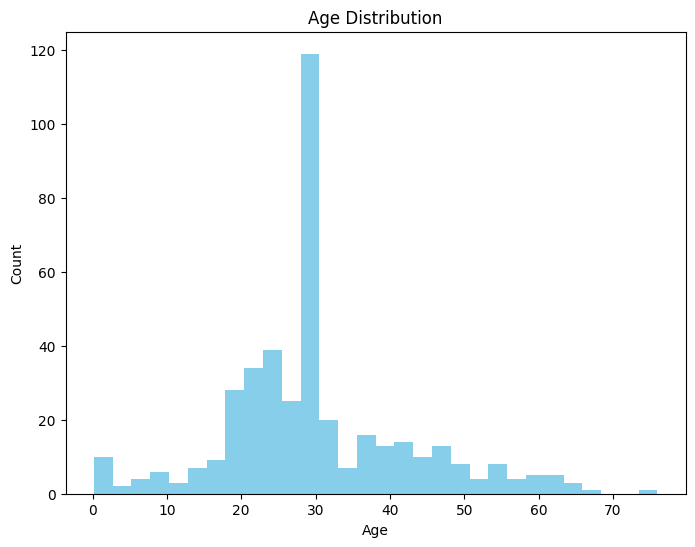

In [26]:
import matplotlib.pyplot as plt

# Histogram for Age distribution
plt.figure(figsize=(8, 6))
plt.hist(data['Age'].dropna(), bins=30, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


2. Bar Plot for Survival Counts:

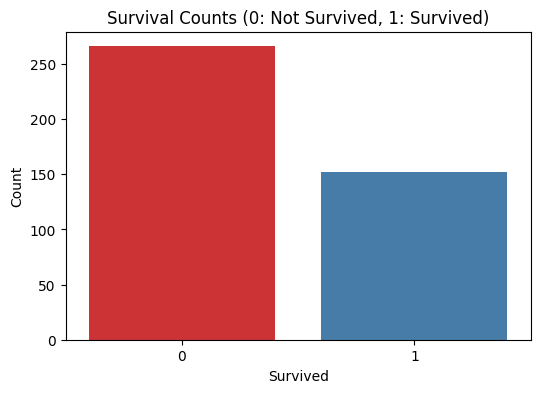

In [28]:
import seaborn as sns

# Bar plot for survival counts
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data, palette='Set1')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Counts (0: Not Survived, 1: Survived)')
plt.show()


**Confusion Matrix:**

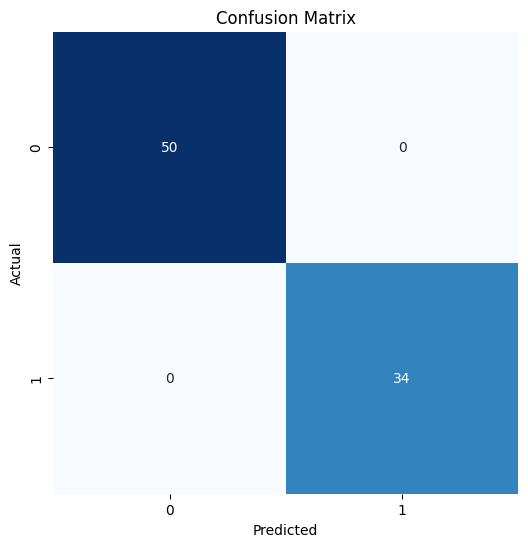

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Precision-Recall Curve:**

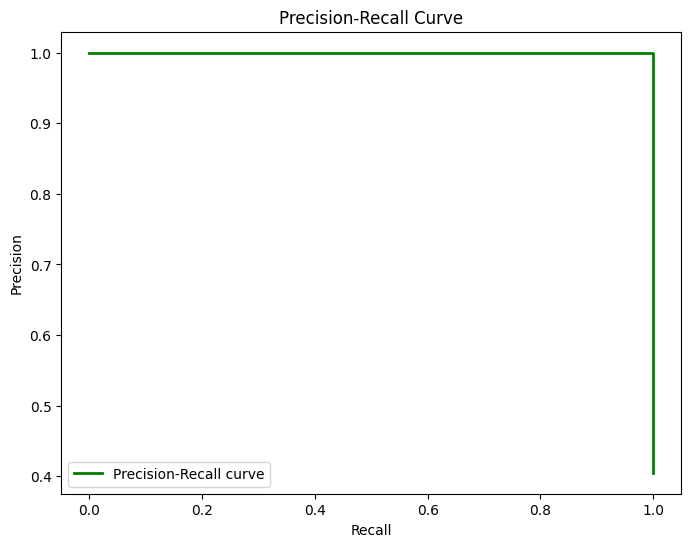

In [30]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
